In [1]:
import os
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.utils import class_weight

from sklearn.metrics import accuracy_score, r2_score, f1_score, classification_report

In [2]:
seed = 1234
os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
tf.random.set_seed(seed)
np.random.seed(seed)

In [3]:
all_data = pd.read_csv('../../Data/TRANSFORMED_DATA/transformed_fep_data.csv')

In [4]:
all_data.groupby('id').size().describe()

count      75.000000
mean      369.746667
std       221.494378
min        46.000000
25%       226.000000
50%       333.000000
75%       445.000000
max      1178.000000
dtype: float64

In [5]:
all_data = all_data[['id', 'xHolo', 'yHolo', 'zHolo', 'Zeni', 'Zeni_transformed']]

In [6]:
all_data['seq_idx'] = all_data.groupby('id').cumcount()

## Pivot sequences

In [7]:
seq_holo_data = all_data.pivot(index='id', columns='seq_idx', values=['xHolo', 'yHolo', 'zHolo', 'Zeni_transformed'])

In [8]:
seq_holo_data.shape

(75, 4712)

In [9]:
seq_holo_data.head()

xHolo                                                    \
seq_idx         0         1         2         3         4         5      
id                                                                       
10_hlth     0.285392  0.283923  0.282483  0.281089  0.279760  0.278511   
10_lvl_one  0.406587  0.404806  0.402873  0.400800  0.398598  0.396275   
10_lvl_two  0.360396  0.362951  0.365095  0.366837  0.368196  0.369199   
11_hlth     0.314562  0.313492  0.312400  0.311276  0.310112  0.308897   
11_lvl_one  0.329497  0.328270  0.327006  0.325701  0.324351  0.322951   

                                                    ... Zeni_transformed       \
seq_idx         6         7         8         9     ...             1168 1169   
id                                                  ...                         
10_hlth     0.277359  0.276317  0.275395  0.274602  ...              NaN  NaN   
10_lvl_one  0.393842  0.391304  0.388671  0.385947  ...              NaN  NaN   
10_lvl_two  0.369881  0.370278  0.370430  0.370375  ...              NaN  NaN   
11_hlth     0.307623  0.306282  0.304868  0.303377  ...              NaN  NaN   
11_lvl_one  0.321492  0.319969  0.318376  0.316705  ...              NaN  NaN   

                                                    
seq_idx    1170 1171 1172 1173 1174 1175 1176 1177  
id                                                  
10_hlth     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
10_lvl_one  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
10_lvl_two  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
11_hlth     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
11_lvl_one  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[5 rows x 4712 columns]

In [10]:
#seq_holo_data.describe()

In [11]:
seq_holo_data.Zeni_transformed

seq_idx     0     1     2     3     4     5     6     7     8     9     ...  \
id                                                                      ...   
10_hlth      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
10_lvl_one   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
10_lvl_two   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
11_hlth      0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0  ...   
11_lvl_one   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
8_lvl_one    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
8_lvl_two    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
9_hlth       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
9_lvl_one    0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0  ...   
9_lvl_two    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

seq_idx     1168  1169  1170  1171  1172  1173  1174  1175  1176  1177  
id                                                                      
10_hlth      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
10_lvl_one   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
10_lvl_two   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
11_hlth      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
11_lvl_one   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
8_lvl_one    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
8_lvl_two    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
9_hlth       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
9_lvl_one    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
9_lvl_two    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[75 rows x 1178 columns]

## 3D to 1D projection

In [12]:
train_df = seq_holo_data.loc[[idx for idx in seq_holo_data.index if not idx.startswith('10_')],:]
test_df = seq_holo_data.loc[[idx for idx in seq_holo_data.index if idx.startswith('10_')],:]

In [13]:
train_df

xHolo                                                    \
seq_idx         0         1         2         3         4         5      
id                                                                       
11_hlth     0.314562  0.313492  0.312400  0.311276  0.310112  0.308897   
11_lvl_one  0.329497  0.328270  0.327006  0.325701  0.324351  0.322951   
11_lvl_two  0.342550  0.341885  0.341187  0.340467  0.339734  0.338994   
12_hlth     0.191283  0.191382  0.191559  0.191814  0.192148  0.192562   
12_lvl_one  0.293994  0.291083  0.288221  0.285421  0.282698  0.280063   
...              ...       ...       ...       ...       ...       ...   
8_lvl_one   0.269693  0.271648  0.273580  0.275480  0.277342  0.279162   
8_lvl_two   0.372910  0.373018  0.373125  0.373224  0.373310  0.373376   
9_hlth      0.330707  0.330411  0.330061  0.329656  0.329196  0.328677   
9_lvl_one   0.378556  0.377586  0.376567  0.375500  0.374390  0.373239   
9_lvl_two   0.379194  0.379202  0.379151  0.379046  0.378890  0.378687   

                                                    ... Zeni_transformed       \
seq_idx         6         7         8         9     ...             1168 1169   
id                                                  ...                         
11_hlth     0.307623  0.306282  0.304868  0.303377  ...              NaN  NaN   
11_lvl_one  0.321492  0.319969  0.318376  0.316705  ...              NaN  NaN   
11_lvl_two  0.338255  0.337520  0.336792  0.336074  ...              NaN  NaN   
12_hlth     0.193056  0.193632  0.194291  0.195033  ...              NaN  NaN   
12_lvl_one  0.277525  0.275094  0.272774  0.270571  ...              NaN  NaN   
...              ...       ...       ...       ...  ...              ...  ...   
8_lvl_one   0.280933  0.282651  0.284315  0.285919  ...              NaN  NaN   
8_lvl_two   0.373410  0.373400  0.373330  0.373189  ...              NaN  NaN   
9_hlth      0.328100  0.327462  0.326762  0.325997  ...              NaN  NaN   
9_lvl_one   0.372052  0.370834  0.369589  0.368324  ...              NaN  NaN   
9_lvl_two   0.378439  0.378151  0.377824  0.377459  ...              NaN  NaN   

                                                    
seq_idx    1170 1171 1172 1173 1174 1175 1176 1177  
id                                                  
11_hlth     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
11_lvl_one  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
11_lvl_two  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
12_hlth     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
12_lvl_one  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
...         ...  ...  ...  ...  ...  ...  ...  ...  
8_lvl_one   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
8_lvl_two   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9_hlth      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9_lvl_one   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  
9_lvl_two   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

[72 rows x 4712 columns]

In [14]:
X_train_df = train_df[['xHolo', 'yHolo', 'zHolo']]
y_train_df = train_df['Zeni_transformed']

X_test_df = test_df[['xHolo', 'yHolo', 'zHolo']]
y_test_df = test_df['Zeni_transformed']

In [15]:
def smv(mat):
    return np.sqrt(np.sum([mat.xHolo**2, mat.yHolo**2, mat.zHolo**2], axis=0))

In [16]:
smv_X_train_df = pd.DataFrame(
    np.concatenate(
        X_train_df.groupby(level = 1, axis = 1).apply(smv).values
    ).reshape(1178, -1)
).T

smv_X_test_df = pd.DataFrame(
    np.concatenate(
        X_test_df.groupby(level = 1, axis = 1).apply(smv).values
    ).reshape(1178, -1)
).T

In [17]:
smv_X_train_df.fillna(0, inplace=True)
smv_X_test_df.fillna(0, inplace=True)

In [18]:
smv_X_train_df

0         1         2         3         4         5         6     \
0   2.544218  2.531987  2.519756  2.507566  2.495453  2.483449  2.471578   
1   2.848561  2.838088  2.827404  2.816512  2.805417  2.794127  2.782656   
2   1.785822  1.781346  1.776775  1.772120  1.767396  1.762616  1.757796   
3   1.878500  1.873117  1.867675  1.862170  1.856602  1.850970  1.845275   
4   1.589088  1.587663  1.586341  1.585117  1.583988  1.582948  1.581989   
..       ...       ...       ...       ...       ...       ...       ...   
67  1.639459  1.640836  1.642412  1.644161  1.646056  1.648070  1.650181   
68  1.552967  1.550679  1.548178  1.545450  1.542502  1.539332  1.535953   
69  1.643743  1.640474  1.637113  1.633666  1.630139  1.626537  1.622872   
70  2.964757  2.955813  2.946850  2.937876  2.928895  2.919916  2.910947   
71  1.394445  1.395200  1.396040  1.396963  1.397964  1.399034  1.400164   

        7         8         9     ...  1168  1169  1170  1171  1172  1173  \
0   2.459860  2.448306  2.436924  ...   0.0   0.0   0.0   0.0   0.0   0.0   
1   2.771015  2.759221  2.747290  ...   0.0   0.0   0.0   0.0   0.0   0.0   
2   1.752951  1.748095  1.743242  ...   0.0   0.0   0.0   0.0   0.0   0.0   
3   1.839520  1.833711  1.827854  ...   0.0   0.0   0.0   0.0   0.0   0.0   
4   1.581102  1.580274  1.579494  ...   0.0   0.0   0.0   0.0   0.0   0.0   
..       ...       ...       ...  ...   ...   ...   ...   ...   ...   ...   
67  1.652366  1.654607  1.656884  ...   0.0   0.0   0.0   0.0   0.0   0.0   
68  1.532403  1.528725  1.524953  ...   0.0   0.0   0.0   0.0   0.0   0.0   
69  1.619153  1.615391  1.611603  ...   0.0   0.0   0.0   0.0   0.0   0.0   
70  2.901993  2.893064  2.884165  ...   0.0   0.0   0.0   0.0   0.0   0.0   
71  1.401342  1.402554  1.403787  ...   0.0   0.0   0.0   0.0   0.0   0.0   

    1174  1175  1176  1177  
0    0.0   0.0   0.0   0.0  
1    0.0   0.0   0.0   0.0  
2    0.0   0.0   0.0   0.0  
3    0.0   0.0   0.0   0.0  
4    0.0   0.0   0.0   0.0  
..   ...   ...   ...   ...  
67   0.0   0.0   0.0   0.0  
68   0.0   0.0   0.0   0.0  
69   0.0   0.0   0.0   0.0  
70   0.0   0.0   0.0   0.0  
71   0.0   0.0   0.0   0.0  

[72 rows x 1178 columns]

In [19]:
y_train_df.fillna(0, inplace=True)
y_test_df.fillna(0, inplace=True)

C:\Users\youne\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [20]:
class DNNModel(tf.keras.Model):
    """
    A class to create the arcitecture of the DNN model

    ...

    Attributes
    ----------
    inputs : array
       the array of inputs that the model would train on
    """

    def __init__(self):
        """
        Initialize the layers of the model
        """
        super(DNNModel, self).__init__()
        
        self.dnn1 = tf.keras.layers.Dense(256, input_shape=(1177,), activation='relu')
        self.dnn2 = tf.keras.layers.Dense(256, activation='relu')
        self.fc1 = tf.keras.layers.Dense(1178, activation='sigmoid')
    
    def call(self, inputs):
        """Forwad propagates the inputs into the model

        Parameters
        ----------
        inputs : array
           the array of inputs that the model would train on

        Returns
        -------
        x : tensor
            the output of the model
        """
        x = self.dnn1(inputs)
        x = self.dnn2(x)
        x = self.fc1(x)
        return x

In [23]:
n_epochs = 15
bs = 256
dnn_model = DNNModel()

dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = dnn_model.fit(
    smv_X_train_df.values, y_train_df.values,
    epochs=n_epochs,
    batch_size=bs
)

Epoch 1/15
1/1 [==============================] - 1s 679ms/step - loss: 0.7127 - accuracy: 0.0000e+00
Epoch 2/15
1/1 [==============================] - 0s 14ms/step - loss: 0.6648 - accuracy: 0.0000e+00
Epoch 3/15
1/1 [==============================] - 0s 20ms/step - loss: 0.6279 - accuracy: 0.0000e+00
Epoch 4/15
1/1 [==============================] - 0s 11ms/step - loss: 0.5786 - accuracy: 0.0278
Epoch 5/15
1/1 [==============================] - 0s 24ms/step - loss: 0.5198 - accuracy: 0.0278
Epoch 6/15
1/1 [==============================] - 0s 14ms/step - loss: 0.4602 - accuracy: 0.0417
Epoch 7/15
1/1 [==============================] - 0s 22ms/step - loss: 0.4084 - accuracy: 0.0278
Epoch 8/15
1/1 [==============================] - 0s 15ms/step - loss: 0.3683 - accuracy: 0.0139
Epoch 9/15
1/1 [==============================] - 0s 15ms/step - loss: 0.3386 - accuracy: 0.0139
Epoch 10/15
1/1 [==============================] - 0s 15ms/step - loss: 0.3153 - accuracy: 0.0278
Epoch 11/15
1/1 

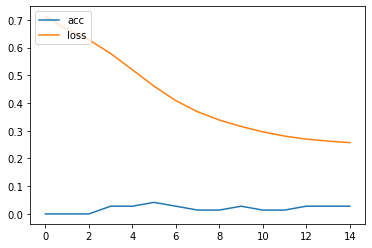

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [25]:
y_pred = np.where(dnn_model.predict(smv_X_test_df.values)>=0.75, 1, 0).reshape(3, 1178)

In [26]:
y_tst_score = np.concatenate(y_test_df.values)
y_pred_score = np.concatenate(y_pred)
print("Accuracy score: ", accuracy_score(y_tst_score, y_pred_score))
print("F1 score: ", f1_score(y_tst_score, y_pred_score))
print(classification_report(y_tst_score, y_pred_score))

Accuracy score:  0.8607809847198642
F1 score:  0.15463917525773196
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      2999
         1.0       0.96      0.08      0.15       535

    accuracy                           0.86      3534
   macro avg       0.91      0.54      0.54      3534
weighted avg       0.87      0.86      0.81      3534




######################################################################
#                            Person n°: 0                            #
######################################################################
    


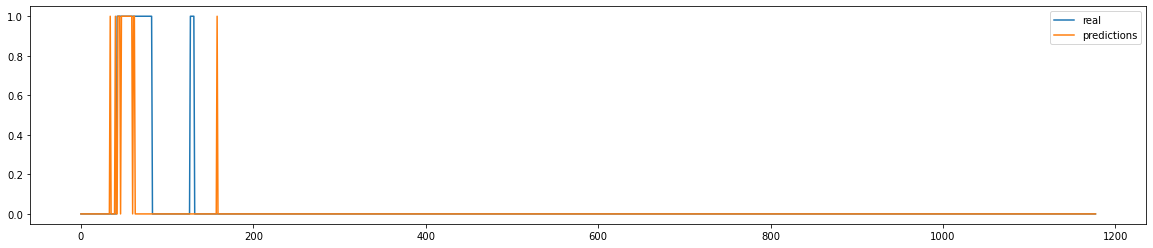

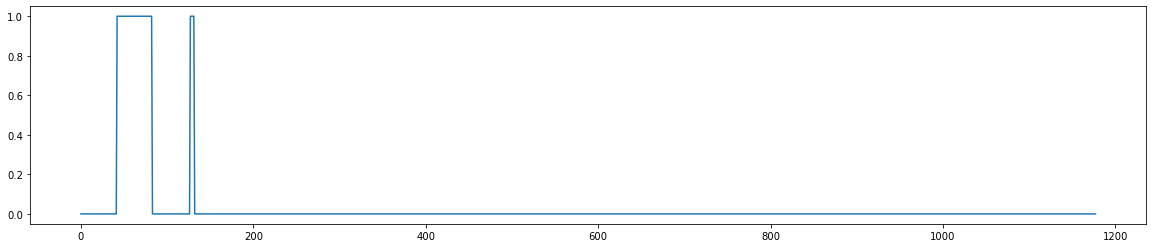

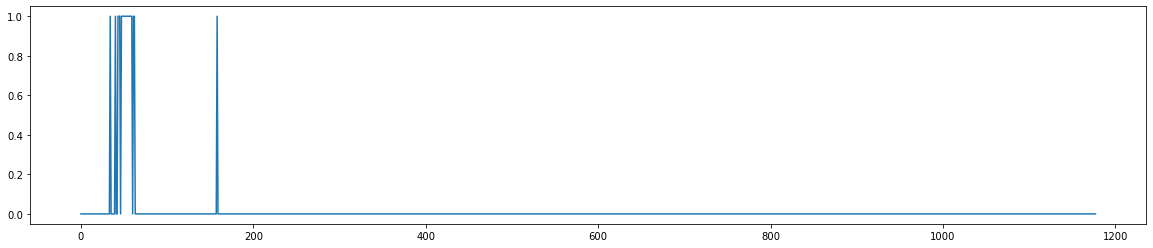


######################################################################
#                            Person n°: 1                            #
######################################################################
    


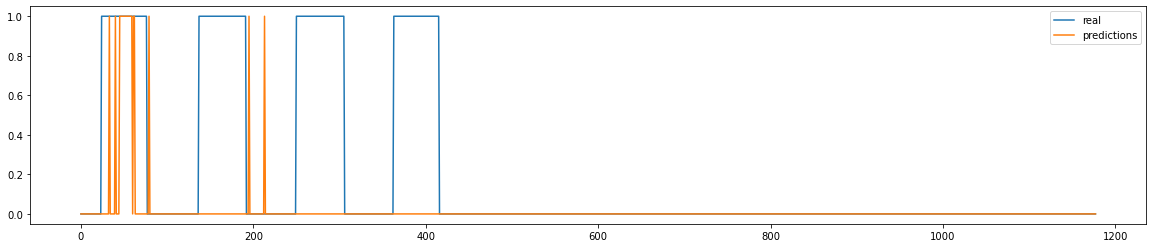

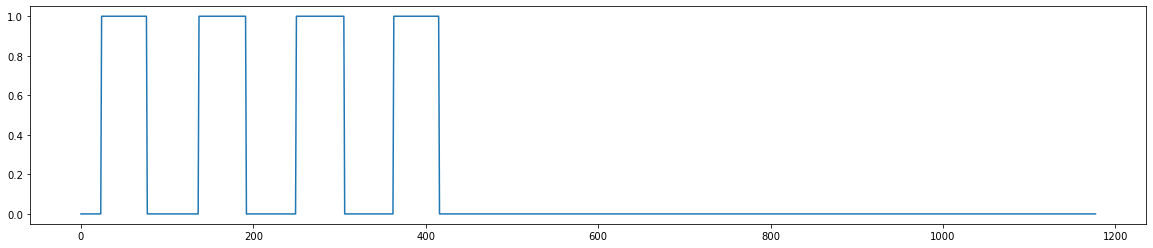

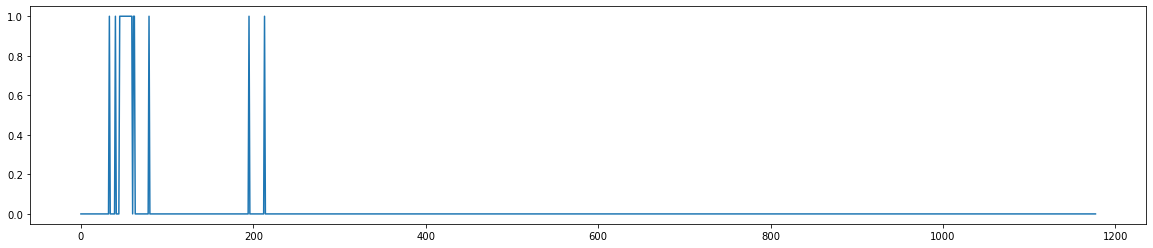


######################################################################
#                            Person n°: 2                            #
######################################################################
    


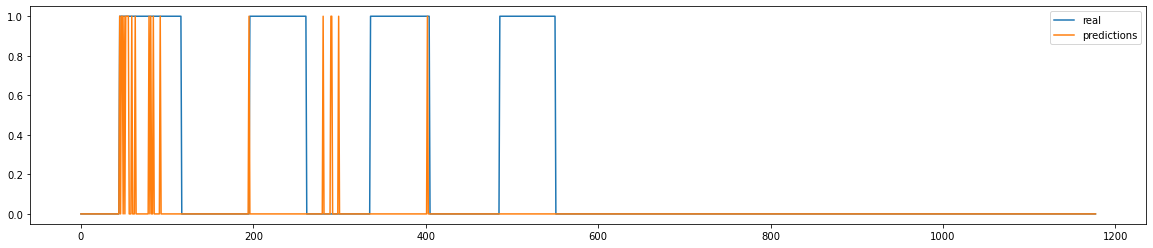

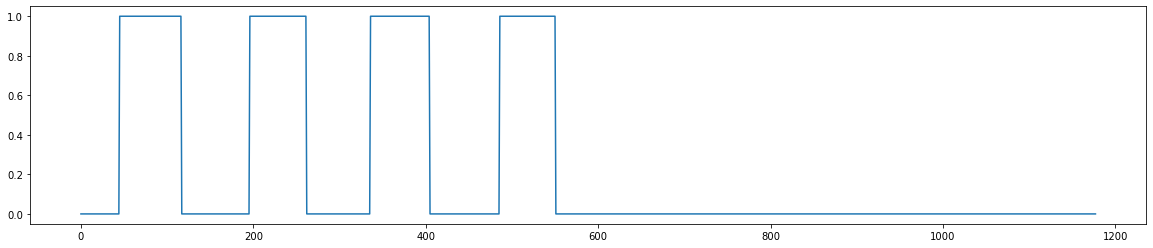

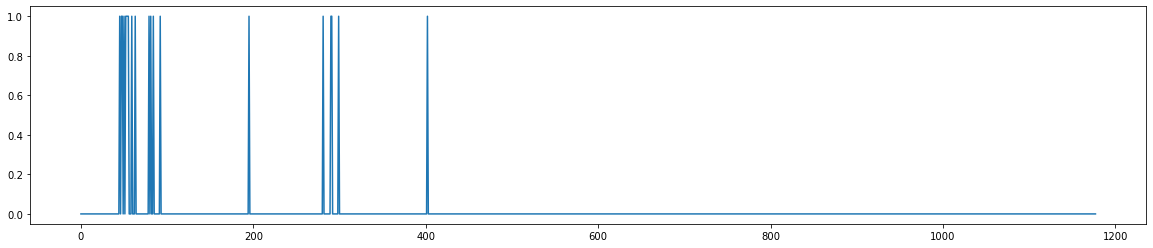

In [155]:
for idx in range(y_test_df.values.shape[0]):
    print("""
######################################################################
#                            Person n°: {}                            #
######################################################################
    """.format(idx))
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx], label="real")
    plt.plot(y_pred[idx], label="predictions")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx])
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_pred[idx])
    plt.show()

In [20]:
counts = y_train_df.apply(pd.Series.value_counts, axis=1).sum(axis=0)

In [21]:
one_count = counts[1] / (counts[0] + counts[1])
zero_count = counts[0] / (counts[0] + counts[1])

In [22]:
zero_count

0.8445222599509526

In [23]:
print(smv_X_train_df.shape, smv_X_test_df.shape)
print(y_train_df.shape, y_test_df.shape)

(72, 1178) (3, 1178)
(72, 1178) (3, 1178)


In [24]:
y_train_df.sum(axis=1).describe()

count     72.000000
mean     183.152778
std      111.512099
min       27.000000
25%      112.250000
50%      169.500000
75%      210.750000
max      601.000000
dtype: float64

In [25]:
smv_X_train_df_r = smv_X_train_df.values.reshape(smv_X_train_df.shape[0], smv_X_train_df.shape[1], 1)
smv_X_test_df_r = smv_X_test_df.values.reshape(smv_X_test_df.shape[0], smv_X_test_df.shape[1], 1)

In [26]:
class BLSTMModel(tf.keras.Model):
    """
    A class to create the arcitecture of the DNN model

    ...

    Attributes
    ----------
    inputs : array
       the array of inputs that the model would train on
    """

    def __init__(self):
        """
        Initialize the layers of the model
        """
        super(BLSTMModel, self).__init__()
        
        self.lstm1 = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(64, input_shape=(1177, 1), return_sequences=True)
        )
        self.lstm2 = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(64, return_sequences=True)
        )
        self.fc1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    def call(self, inputs):
        """Forwad propagates the inputs into the model

        Parameters
        ----------
        inputs : array
           the array of inputs that the model would train on

        Returns
        -------
        x : tensor
            the output of the model
        """
        x = self.lstm1(inputs)
        x = self.lstm2(x)
        x = self.fc1(x)
        return x

In [27]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]


In [28]:
n_epochs = 5
bs = 2048
blstm_model = BLSTMModel()

blstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

history = blstm_model.fit(
    smv_X_train_df_r, y_train_df.values,
    epochs=n_epochs,
    batch_size=bs
)

Epoch 1/5
1/1 [==============================] - 41s 41s/step - loss: 0.6936 - tp: 13175.0000 - fp: 17446.0000 - tn: 54183.0000 - fn: 12.0000 - accuracy: 0.7942 - precision: 0.4303 - recall: 0.9991 - auc: 0.9012 - prc: 0.4794
Epoch 2/5
1/1 [==============================] - 29s 29s/step - loss: 0.6903 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 71629.0000 - fn: 13187.0000 - accuracy: 0.8445 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0882 - prc: 0.0870
Epoch 3/5
1/1 [==============================] - 31s 31s/step - loss: 0.6748 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 71629.0000 - fn: 13187.0000 - accuracy: 0.8445 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.0855 - prc: 0.0868
Epoch 4/5
1/1 [==============================] - 31s 31s/step - loss: 0.6639 - tp: 13096.0000 - fp: 13311.0000 - tn: 58318.0000 - fn: 91.0000 - accuracy: 0.8420 - precision: 0.4959 - recall: 0.9931 - auc: 0.9068 - prc: 0.4931
Epoch 5/5
1/1 [==============================] - 29s 29s/step - loss: 0.65

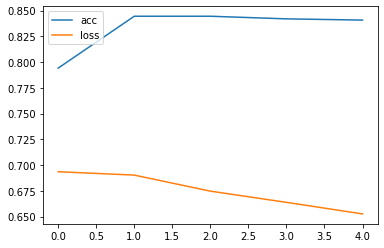

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [30]:
y_pred = np.where(blstm_model.predict(smv_X_test_df_r)>=0.5, 1, 0).reshape(3, 1178)

In [31]:
y_tst_score = np.concatenate(y_test_df.values)
y_pred_score = np.concatenate(y_pred)
print("Accuracy score: ", accuracy_score(y_tst_score, y_pred_score))
print(classification_report(y_tst_score, y_pred_score))

Accuracy score:  0.8237125070741369
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88      2999
         1.0       0.46      1.00      0.63       535

    accuracy                           0.82      3534
   macro avg       0.73      0.89      0.76      3534
weighted avg       0.92      0.82      0.85      3534



In [32]:
print(classification_report(y_test_df.values, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

C:\Users\youne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\youne\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



######################################################################
#                            Person n°: 0                            #
######################################################################
    


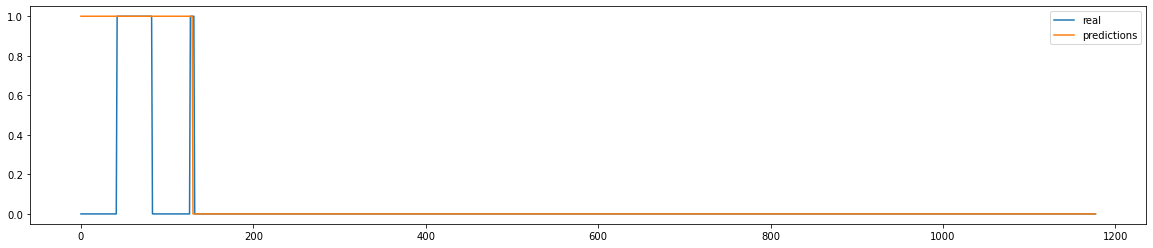

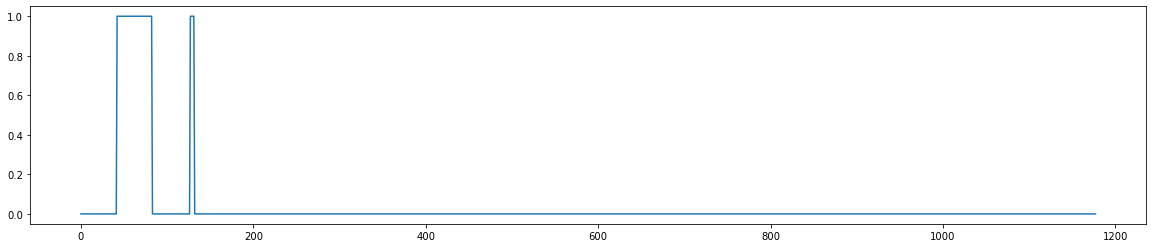

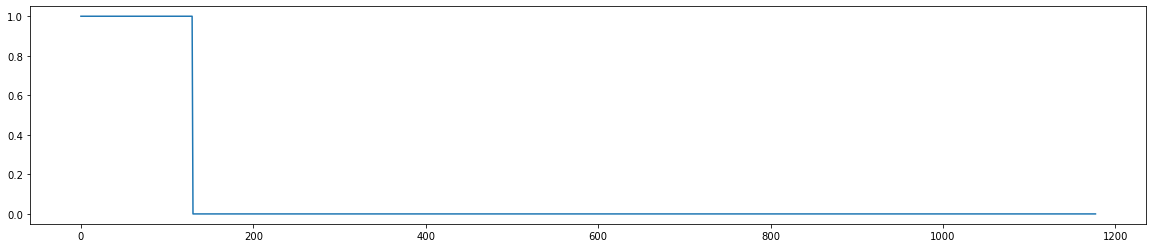


######################################################################
#                            Person n°: 1                            #
######################################################################
    


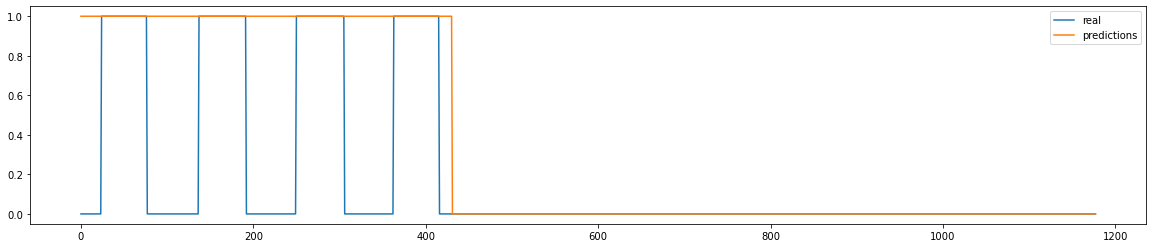

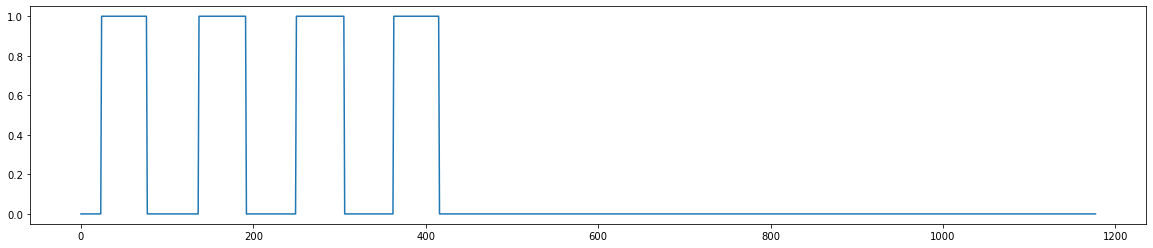

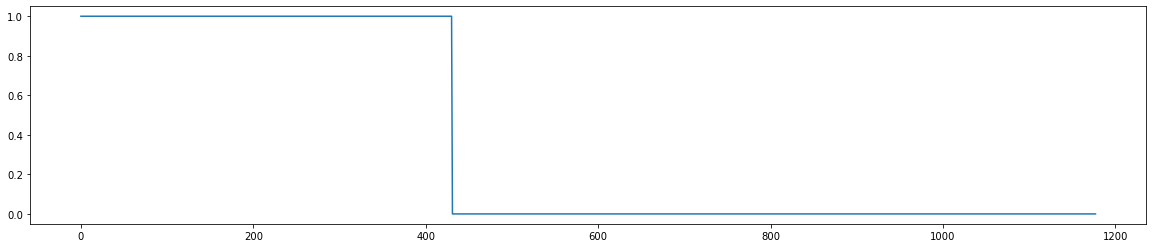


######################################################################
#                            Person n°: 2                            #
######################################################################
    


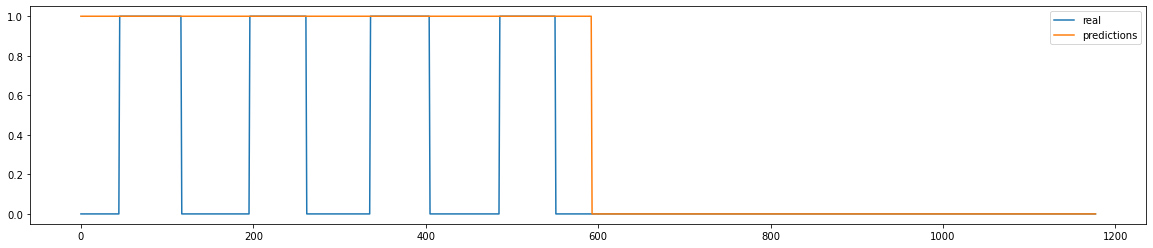

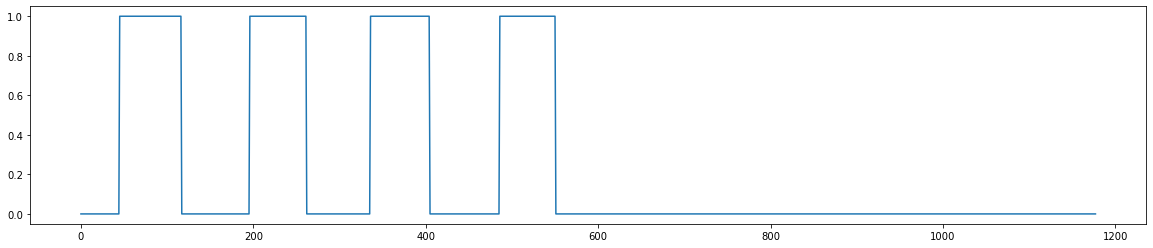

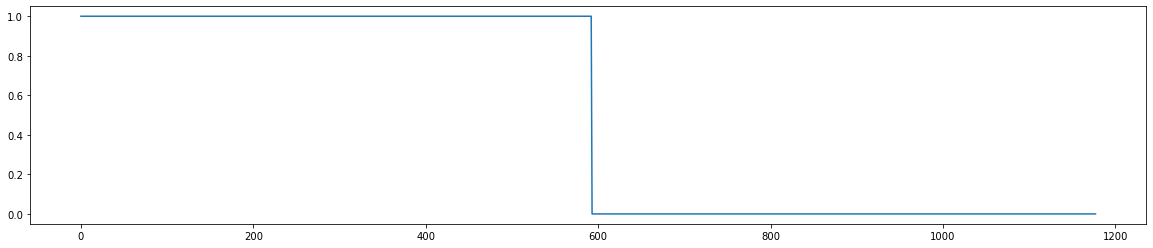

In [33]:
for idx in range(y_test_df.values.shape[0]):
    print("""
######################################################################
#                            Person n°: {}                            #
######################################################################
    """.format(idx))
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx], label="real")
    plt.plot(y_pred[idx], label="predictions")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx])
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_pred[idx])
    plt.show()

In [42]:
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)

In [159]:
xholo_train = train_df['xHolo']
yholo_train = train_df['yHolo']
zholo_train = train_df['zHolo']

xholo_test = test_df['xHolo']
yholo_test = test_df['yHolo']
zholo_test = test_df['zHolo']

In [160]:
xholo_train

seq_idx         0         1         2         3         4         5     \
id                                                                       
11_hlth     0.314562  0.313492  0.312400  0.311276  0.310112  0.308897   
11_lvl_one  0.329497  0.328270  0.327006  0.325701  0.324351  0.322951   
11_lvl_two  0.342550  0.341885  0.341187  0.340467  0.339734  0.338994   
12_hlth     0.191283  0.191382  0.191559  0.191814  0.192148  0.192562   
12_lvl_one  0.293994  0.291083  0.288221  0.285421  0.282698  0.280063   
...              ...       ...       ...       ...       ...       ...   
8_lvl_one   0.269693  0.271648  0.273580  0.275480  0.277342  0.279162   
8_lvl_two   0.372910  0.373018  0.373125  0.373224  0.373310  0.373376   
9_hlth      0.330707  0.330411  0.330061  0.329656  0.329196  0.328677   
9_lvl_one   0.378556  0.377586  0.376567  0.375500  0.374390  0.373239   
9_lvl_two   0.379194  0.379202  0.379151  0.379046  0.378890  0.378687   

seq_idx         6         7         8         9     ...  1168  1169  1170  \
id                                                  ...                     
11_hlth     0.307623  0.306282  0.304868  0.303377  ...   0.0   0.0   0.0   
11_lvl_one  0.321492  0.319969  0.318376  0.316705  ...   0.0   0.0   0.0   
11_lvl_two  0.338255  0.337520  0.336792  0.336074  ...   0.0   0.0   0.0   
12_hlth     0.193056  0.193632  0.194291  0.195033  ...   0.0   0.0   0.0   
12_lvl_one  0.277525  0.275094  0.272774  0.270571  ...   0.0   0.0   0.0   
...              ...       ...       ...       ...  ...   ...   ...   ...   
8_lvl_one   0.280933  0.282651  0.284315  0.285919  ...   0.0   0.0   0.0   
8_lvl_two   0.373410  0.373400  0.373330  0.373189  ...   0.0   0.0   0.0   
9_hlth      0.328100  0.327462  0.326762  0.325997  ...   0.0   0.0   0.0   
9_lvl_one   0.372052  0.370834  0.369589  0.368324  ...   0.0   0.0   0.0   
9_lvl_two   0.378439  0.378151  0.377824  0.377459  ...   0.0   0.0   0.0   

seq_idx     1171  1172  1173  1174  1175  1176  1177  
id                                                    
11_hlth      0.0   0.0   0.0   0.0   0.0   0.0   0.0  
11_lvl_one   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
11_lvl_two   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
12_hlth      0.0   0.0   0.0   0.0   0.0   0.0   0.0  
12_lvl_one   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...          ...   ...   ...   ...   ...   ...   ...  
8_lvl_one    0.0   0.0   0.0   0.0   0.0   0.0   0.0  
8_lvl_two    0.0   0.0   0.0   0.0   0.0   0.0   0.0  
9_hlth       0.0   0.0   0.0   0.0   0.0   0.0   0.0  
9_lvl_one    0.0   0.0   0.0   0.0   0.0   0.0   0.0  
9_lvl_two    0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[72 rows x 1178 columns]

In [161]:
xholo_train_r = xholo_train.values.reshape(xholo_train.shape[0], xholo_train.shape[1], 1)
yholo_train_r = yholo_train.values.reshape(yholo_train.shape[0], yholo_train.shape[1], 1)
zholo_train_r = zholo_train.values.reshape(zholo_train.shape[0], zholo_train.shape[1], 1)

xholo_test_r = xholo_test.values.reshape(xholo_test.shape[0], xholo_test.shape[1], 1)
yholo_test_r = yholo_test.values.reshape(yholo_test.shape[0], yholo_test.shape[1], 1)
zholo_test_r = zholo_test.values.reshape(zholo_test.shape[0], zholo_test.shape[1], 1)

In [57]:
xholo_train.shape

(72, 1178, 1)

In [69]:
class BLSTMMultiModel(tf.keras.Model):
    """
    A class to create the arcitecture of the DNN model

    ...

    Attributes
    ----------
    inputs : array
       the array of inputs that the model would train on
    """

    def __init__(self):
        """
        Initialize the layers of the model
        """
        super(BLSTMMultiModel, self).__init__()
        
        self.lstm1_1 = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(32, input_shape=(1177, 1), return_sequences=True)
        )
        self.lstm2_1 = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(32, return_sequences=True)
        )
        
        self.lstm1_2 = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(32, input_shape=(1177, 1), return_sequences=True)
        )
        self.lstm2_2 = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(32, return_sequences=True)
        )
        
        self.lstm1_3 = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(32, input_shape=(1177, 1), return_sequences=True)
        )
        self.lstm2_3 = tf.keras.layers.Bidirectional(
            tf.keras.layers.LSTM(32, return_sequences=True)
        )
        
        self.fc1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    def call(self, inputs):
        """Forwad propagates the inputs into the model

        Parameters
        ----------
        inputs : array
           the array of inputs that the model would train on

        Returns
        -------
        x : tensor
            the output of the model
        """
        input_x = inputs[0]
        input_y = inputs[1]
        input_z = inputs[2]
        
        x_1 = self.lstm1_1(input_x)
        x_1 = self.lstm2_1(x_1)
        
        x_2 = self.lstm1_2(input_y)
        x_2 = self.lstm2_2(x_2)
        
        x_3 = self.lstm1_3(input_z)
        x_3 = self.lstm2_3(x_3)
        
        x = tf.keras.layers.Concatenate()([x_1, x_2, x_3])
        
        x = self.fc1(x)
        return x

In [70]:
n_epochs = 5
bs = 2048
blstm_multi_model = BLSTMMultiModel()

blstm_multi_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

history = blstm_multi_model.fit(
    [xholo_train, yholo_train, zholo_train], y_train_df.values,
    epochs=n_epochs,
    #batch_size=bs
)

Epoch 1/5
3/3 [==============================] - 45s 5s/step - loss: 0.6888 - tp: 10563.2500 - fp: 10936.0000 - tn: 120278.2500 - fn: 13718.5000 - accuracy: 0.8415 - precision: 0.4917 - recall: 0.4266 - auc: 0.7090 - prc: 0.3408
Epoch 2/5
3/3 [==============================] - 18s 6s/step - loss: 0.6546 - tp: 665.0000 - fp: 632.0000 - tn: 58814.0000 - fn: 10569.0000 - accuracy: 0.8391 - precision: 0.5127 - recall: 0.0641 - auc: 0.7709 - prc: 0.4517
Epoch 3/5
3/3 [==============================] - 24s 8s/step - loss: 0.6038 - tp: 111.5000 - fp: 96.2500 - tn: 59493.5000 - fn: 10978.7500 - accuracy: 0.8422 - precision: 0.2687 - recall: 0.0085 - auc: 0.7799 - prc: 0.4486      
Epoch 4/5
3/3 [==============================] - 25s 7s/step - loss: 0.5264 - tp: 3274.5000 - fp: 3049.7500 - tn: 56269.5000 - fn: 8086.2500 - accuracy: 0.8394 - precision: 0.5197 - recall: 0.2856 - auc: 0.8541 - prc: 0.4818
Epoch 5/5
3/3 [==============================] - 30s 10s/step - loss: 0.4048 - tp: 3978.0000 

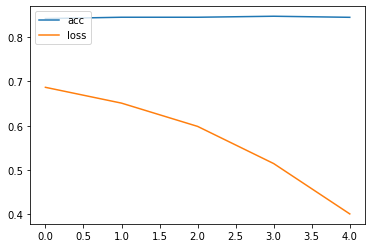

In [71]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [72]:
y_pred = np.where(blstm_multi_model.predict([xholo_test, yholo_test, zholo_test])>=0.5, 1, 0).reshape(3, 1178)

In [73]:
y_tst_score = np.concatenate(y_test_df.values)
y_pred_score = np.concatenate(y_pred)
print("Accuracy score: ", accuracy_score(y_tst_score, y_pred_score))
print(classification_report(y_tst_score, y_pred_score))

Accuracy score:  0.8406904357668364
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91      2999
         1.0       0.45      0.24      0.31       535

    accuracy                           0.84      3534
   macro avg       0.66      0.59      0.61      3534
weighted avg       0.81      0.84      0.82      3534




######################################################################
#                            Person n°: 0                            #
######################################################################
    


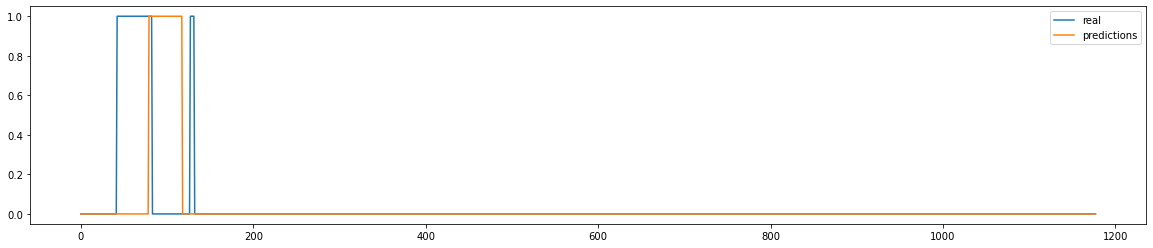

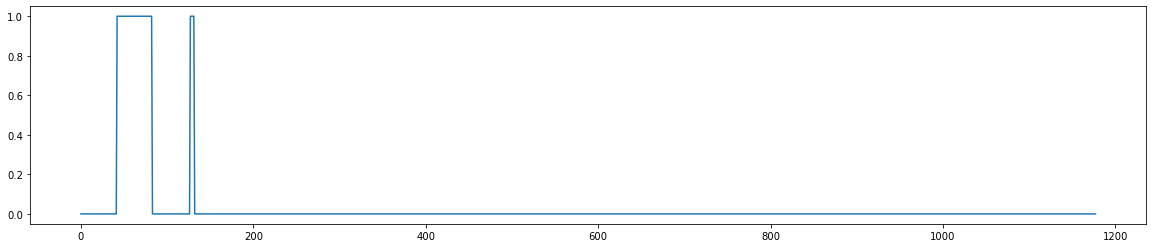

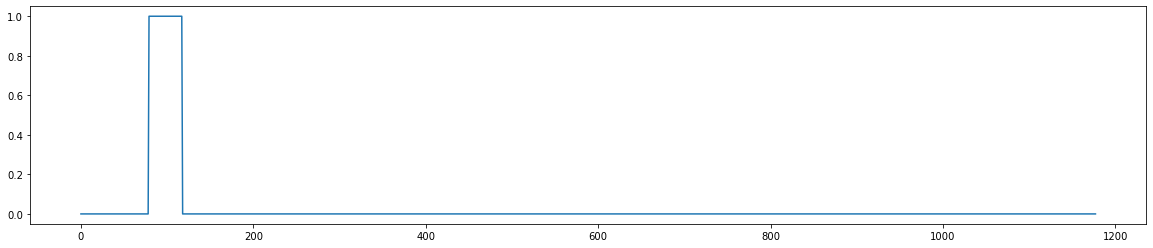


######################################################################
#                            Person n°: 1                            #
######################################################################
    


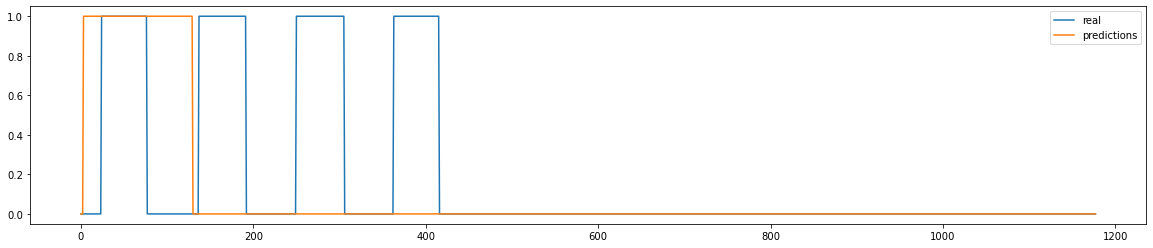

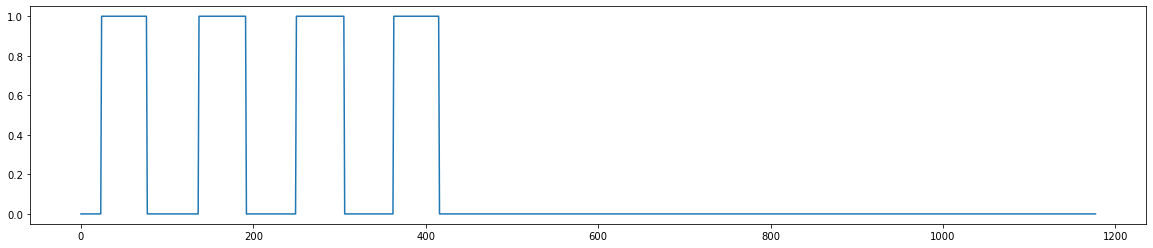

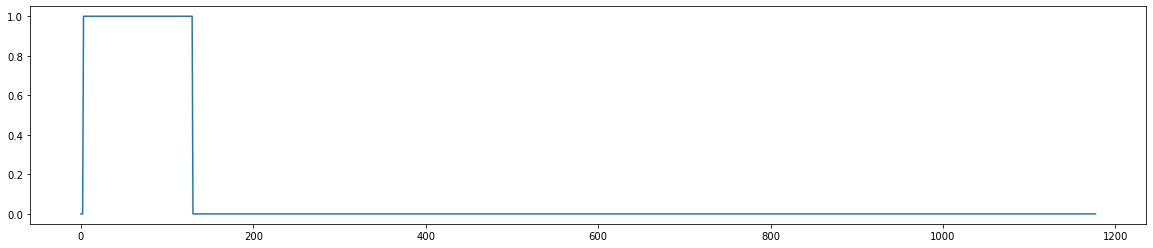


######################################################################
#                            Person n°: 2                            #
######################################################################
    


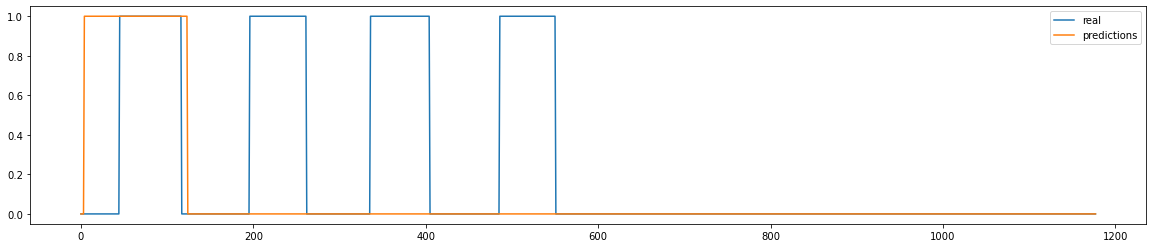

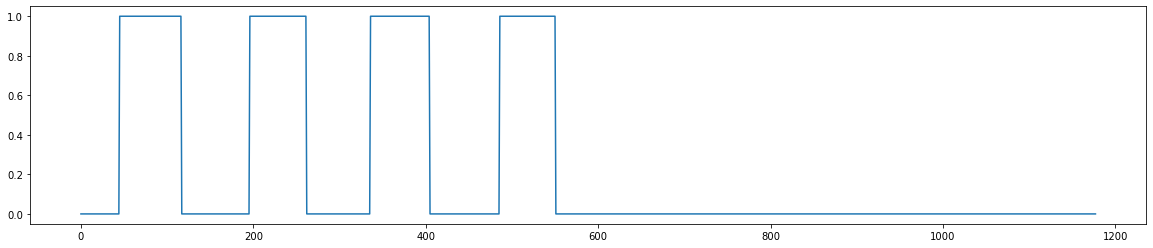

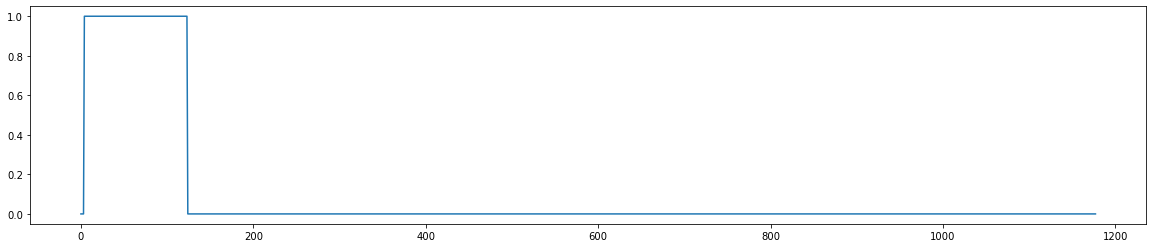

In [74]:
for idx in range(y_test_df.values.shape[0]):
    print("""
######################################################################
#                            Person n°: {}                            #
######################################################################
    """.format(idx))
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx], label="real")
    plt.plot(y_pred[idx], label="predictions")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx])
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_pred[idx])
    plt.show()

In [182]:
class DNNMultiModel(tf.keras.Model):
    """
    A class to create the arcitecture of the DNN model

    ...

    Attributes
    ----------
    inputs : array
       the array of inputs that the model would train on
    """

    def __init__(self):
        """
        Initialize the layers of the model
        """
        super(DNNMultiModel, self).__init__()
        
        self.dnn1_1 = tf.keras.layers.Dense(256, input_shape=(1177,), activation='relu')
        self.dnn1_2 = tf.keras.layers.Dense(256, activation='relu')
        
        self.dnn2_1 = tf.keras.layers.Dense(256, input_shape=(1177,), activation='relu')
        self.dnn2_2 = tf.keras.layers.Dense(256, activation='relu')
        
        self.dnn3_1 = tf.keras.layers.Dense(256, input_shape=(1177,), activation='relu')
        self.dnn3_2 = tf.keras.layers.Dense(256, activation='relu')
        
        self.fc1 = tf.keras.layers.Dense(1178, activation='sigmoid')
    
    def call(self, inputs):
        """Forwad propagates the inputs into the model

        Parameters
        ----------
        inputs : array
           the array of inputs that the model would train on

        Returns
        -------
        x : tensor
            the output of the model
        """
        input_x = inputs[0]
        input_y = inputs[1]
        input_z = inputs[2]
        
        x_1 = self.dnn1_1(input_x)
        x_1 = self.dnn1_2(x_1)
        
        x_2 = self.dnn2_1(input_y)
        x_2 = self.dnn2_2(x_2)
        
        x_3 = self.dnn3_1(input_z)
        x_3 = self.dnn3_2(x_3)
        
        x = tf.keras.layers.Concatenate()([x_1, x_2, x_3])
        x = self.fc1(x)
        return x

In [183]:
n_epochs = 5
bs = 2048
dnn_multi_model = DNNMultiModel()

dnn_multi_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=METRICS)

history = dnn_multi_model.fit(
    [xholo_train.values, yholo_train.values, zholo_train.values], y_train_df.values,
    epochs=n_epochs,
    #batch_size=bs
)

Epoch 1/5
3/3 [==============================] - 4s 100ms/step - loss: 0.6879 - tp: 11636.2500 - fp: 29311.0000 - tn: 101903.2500 - fn: 12645.5000 - accuracy: 0.7315 - precision: 0.2863 - recall: 0.4802 - auc: 0.7438 - prc: 0.3641
Epoch 2/5
3/3 [==============================] - 0s 105ms/step - loss: 0.4965 - tp: 3905.5000 - fp: 4432.5000 - tn: 55013.5000 - fn: 7328.5000 - accuracy: 0.8300 - precision: 0.4654 - recall: 0.3470 - auc: 0.6980 - prc: 0.3921
Epoch 3/5
3/3 [==============================] - 0s 93ms/step - loss: 0.3565 - tp: 3456.2500 - fp: 1913.2500 - tn: 57676.5000 - fn: 7634.0000 - accuracy: 0.8640 - precision: 0.6444 - recall: 0.3100 - auc: 0.7950 - prc: 0.4912
Epoch 4/5
3/3 [==============================] - 0s 100ms/step - loss: 0.3187 - tp: 3915.2500 - fp: 2147.2500 - tn: 57172.0000 - fn: 7445.5000 - accuracy: 0.8613 - precision: 0.6482 - recall: 0.3404 - auc: 0.8725 - prc: 0.5764
Epoch 5/5
3/3 [==============================] - 0s 99ms/step - loss: 0.2535 - tp: 4661.7

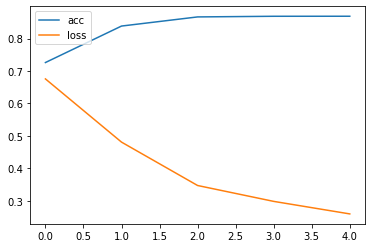

In [184]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['acc', 'loss'], loc='upper left')
plt.show()

In [194]:
y_pred = np.where(dnn_multi_model.predict([xholo_test, yholo_test, zholo_test])>=0.75, 1, 0).reshape(3, 1178)

In [195]:
y_tst_score = np.concatenate(y_test_df.values)
y_pred_score = np.concatenate(y_pred)
print("Accuracy score: ", accuracy_score(y_tst_score, y_pred_score))
print(classification_report(y_tst_score, y_pred_score))

Accuracy score:  0.8585172608941709
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.92      2999
         1.0       0.78      0.09      0.16       535

    accuracy                           0.86      3534
   macro avg       0.82      0.54      0.54      3534
weighted avg       0.85      0.86      0.81      3534




######################################################################
#                            Person n°: 0                            #
######################################################################
    


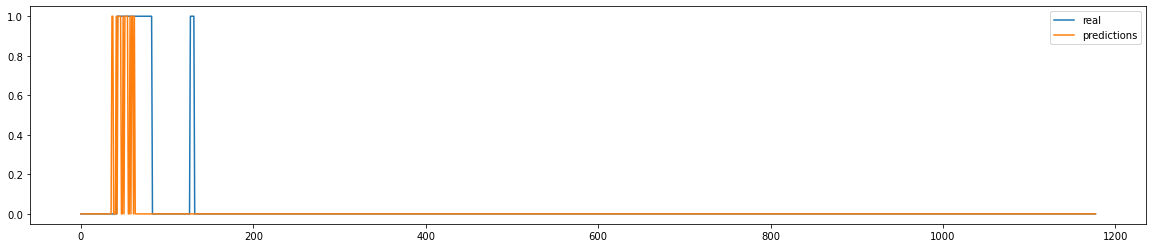

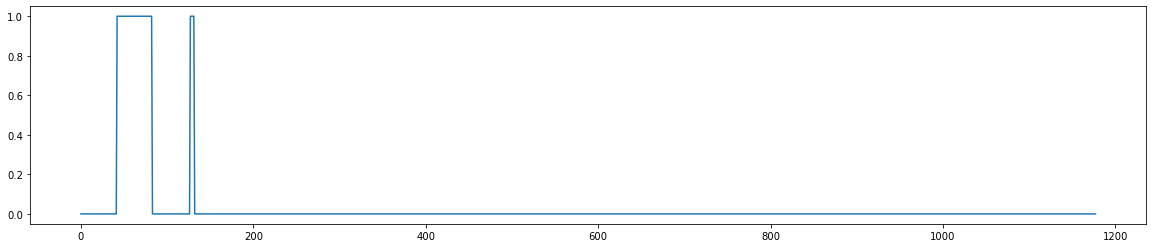

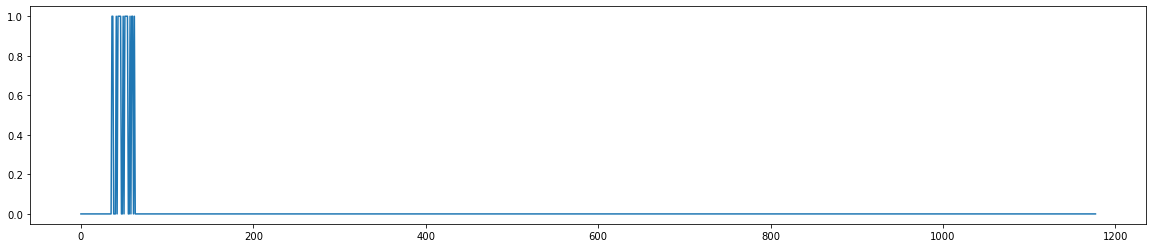


######################################################################
#                            Person n°: 1                            #
######################################################################
    


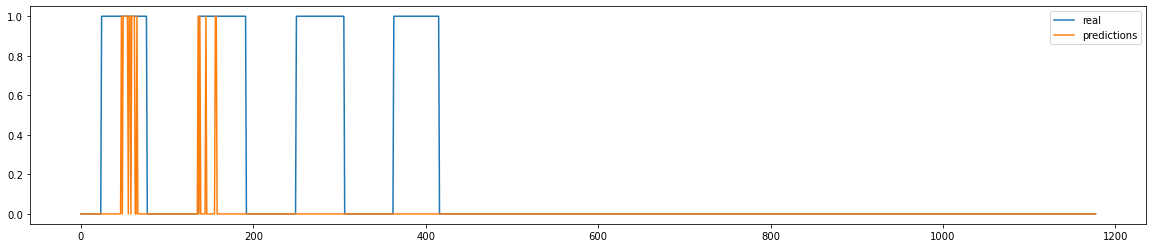

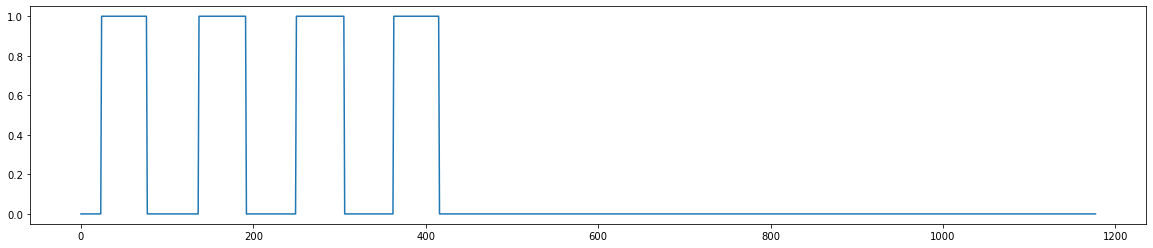

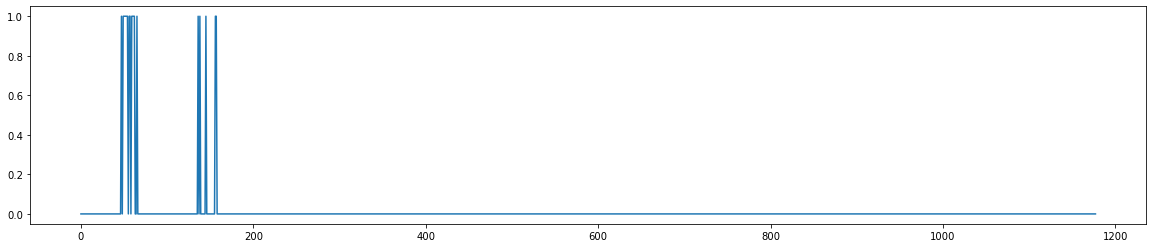


######################################################################
#                            Person n°: 2                            #
######################################################################
    


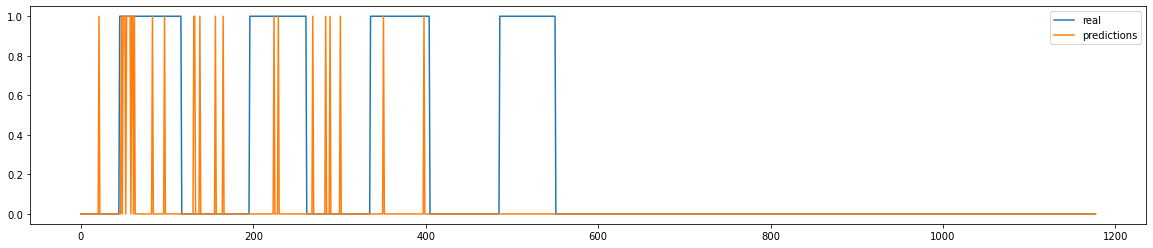

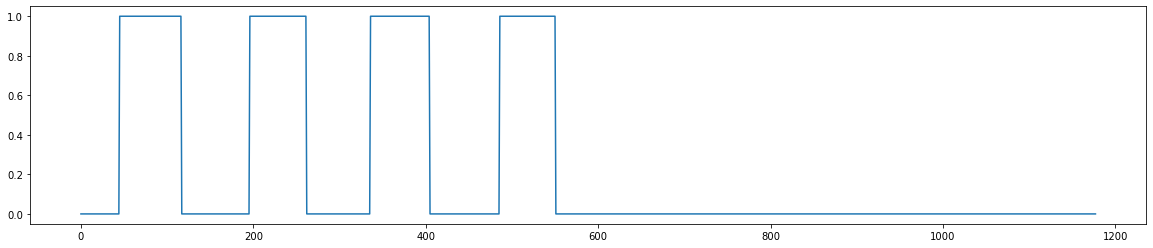

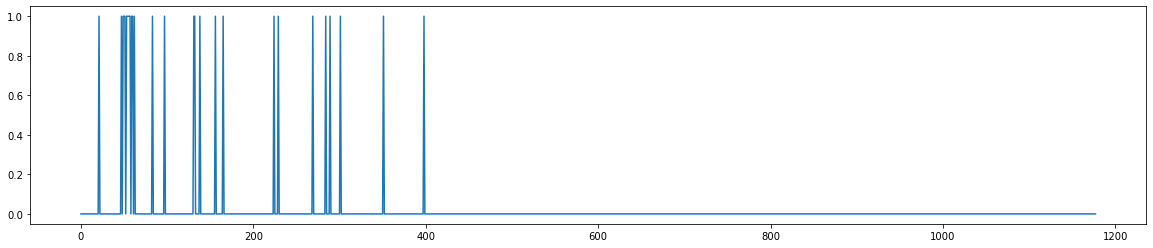

In [196]:
for idx in range(y_test_df.values.shape[0]):
    print("""
######################################################################
#                            Person n°: {}                            #
######################################################################
    """.format(idx))
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx], label="real")
    plt.plot(y_pred[idx], label="predictions")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_test_df.values[idx])
    plt.show()
    
    plt.figure(figsize=(20,4))
    plt.plot(y_pred[idx])
    plt.show()